<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Building-a-CNN-from-Scratch---Lab" data-toc-modified-id="Building-a-CNN-from-Scratch---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Building a CNN from Scratch - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Loading-the-Images" data-toc-modified-id="Loading-the-Images-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading the Images</a></span></li><li><span><a href="#Designing-the-Model" data-toc-modified-id="Designing-the-Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Designing the Model</a></span></li><li><span><a href="#Training-and-Evaluating-the-Model" data-toc-modified-id="Training-and-Evaluating-the-Model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Training and Evaluating the Model</a></span></li><li><span><a href="#Save-the-Model" data-toc-modified-id="Save-the-Model-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Save the Model</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Data Augmentation</a></span></li><li><span><a href="#Final-Evaluation" data-toc-modified-id="Final-Evaluation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Final Evaluation</a></span></li><li><span><a href="#Extension:-Adding-Data-to-the-Model" data-toc-modified-id="Extension:-Adding-Data-to-the-Model-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Extension: Adding Data to the Model</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to implement them via Keras, its time to pratice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

You will be able to:
* Transform images into tensors
* Build a CNN model for image recognition

## Loading the Images

The data for this lab concerns classifying lung xray images for pneumonia. The original dataset is from kaggle. We have downsampled this dataset in order to reduce trainging time for you when you design and fit your model to the data. It is anticipated that this process will take approximately 1 hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **chest_xray**, of this repository.

In [1]:
import datetime
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

In [3]:
train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


## Designing the Model

Now it's time to design your CNN! Remember a few things when doing this: 
* You should alternate convolutional and pooling layers
* You should have later layers have a larger number of parameters in order to detect more abstract patterns
* Add some final dense layers to add a classifier to the convolutional base

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0901 22:03:44.983227 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 22:03:45.018009 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 22:03:45.031070 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 22:03:45.055058 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Pleas

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.**

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0901 23:56:08.046264 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 23:56:08.052726 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0901 23:56:08.058846 4546278848 deprecation.py:323] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

W0901 23:56:35.647058 4546278848 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 50s 495ms/step - loss: 0.5142 - acc: 0.7718 - val_loss: 0.7071 - val_acc: 0.7500
Epoch 2/30
100/100 [==============================] - 51s 510ms/step - loss: 0.2892 - acc: 0.8863 - val_loss: 0.7208 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 77s 772ms/step - loss: 0.1960 - acc: 0.9238 - val_loss: 1.2672 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 59s 586ms/step - loss: 0.1396 - acc: 0.9434 - val_loss: 0.7192 - val_acc: 0.7500
Epoch 5/30
100/100 [==============================] - 61s 609ms/step - loss: 0.1251 - acc: 0.9500 - val_loss: 0.6877 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 53s 527ms/step - loss: 0.1099 - acc: 0.9584 - val_loss: 1.7349 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 55s 547ms/step - loss: 0.0986 - acc: 0.9620 - val_loss: 1.2117 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 5

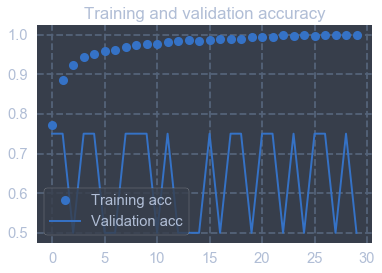

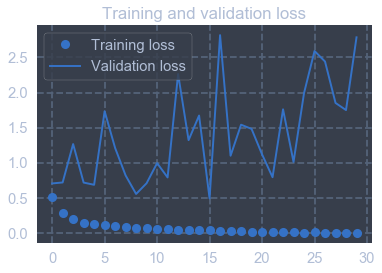

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

NameError: name 'start' is not defined

## Save the Model

In [ ]:
model.save('chest_xray_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.**

In [ ]:
#Add data augmentation to the model setup and set the model to train; 
#See warnings above if you intend to run this block of code

In [ ]:
start = datetime.datetime.now()

In [ ]:
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))

In [ ]:
model.save('chest_xray_downsampled_with_augmentation_data.h5')

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice.

In [ ]:
# Your code here; perform a final evaluation using the test set..

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

## Extension: Adding Data to the Model

As discussed, the current dataset we worked with is a subset of a dataset hosted on Kaggle. Increasing the data that we use to train the model will result in additional performance gains but will also result in longer training times and be more resource intensive.   

It is estimated that training on the full dataset will take approximately 4 hours (and potentially significantly longer) depending on your computer's specifications.

In order to test the impact of training on the full dataset, start by downloading the data from kaggle here: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.   

In [ ]:
start = datetime.datetime.now()

train_dir = 'chest_xray/train'
validation_dir = 'chest_xray/val/'
test_dir = 'chest_xray/test/'

#Basic Data Loading; All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # This is the target directory
#         train_dir,
#         # All images will be resized to 150x150
#         target_size=(150, 150),
#         batch_size=20,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='binary')

#With Data Augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#Never apply data augmentation to test/validation sets 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

#Design Model Architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


#Viz

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.save('chest_xray_all_with_augmentation_data.h5')

end = datetime.datetime.now()
elapsed = end - start
print('Full data model training and evaluation took a total of:\n {}'.format(elapsed))

## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.